# How to Use Scitkit-Learn

general steps

1. import and instantiate a model
2. split data into train and test sets with independent and dependent variables
3. fit the model to data
4. evaluate model performance

general form for importing a Model (Estimator) is

```from sklearn.family import Model```

for linear regression ex.

```from sklearn.linear_model import LinearRegression```

and set the Model parameters when it is instantiated

```lm = LinearRegression(normalize=True)```

```print(model)```



# sklearn Primer P1

In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [8]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [9]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
punct      5572 non-null int64
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [12]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

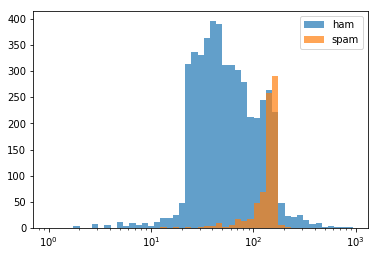

In [16]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins = bins, alpha = .7)
plt.hist(df[df['label']=='spam']['length'], bins = bins, alpha = .7)
plt.legend(('ham','spam'))
plt.show()

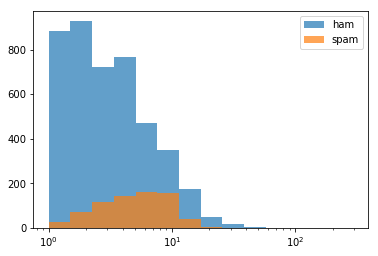

In [21]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins = bins, alpha = .7)
plt.hist(df[df['label']=='spam']['punct'], bins = bins, alpha = .7)
plt.legend(('ham','spam'))
plt.show()

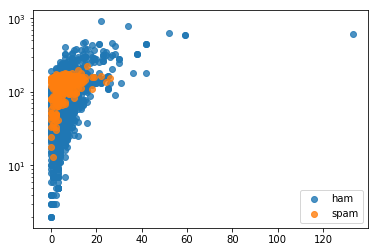

In [25]:
# plt.xscale('log')
plt.yscale('log')
plt.scatter(df[df['label']=='ham']['punct'], df[df['label']=='ham']['length'], alpha = .8)
plt.scatter(df[df['label']=='spam']['punct'], df[df['label']=='spam']['length'], alpha = .8)
plt.legend(('ham','spam'))
plt.show()

In [27]:
# train a model

from sklearn.model_selection import train_test_split

In [29]:
# X feature data
X = df[['length','punct']]

# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [32]:
X_train.shape, X_test.shape

((3900, 2), (1672, 2))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# sklearn Primer P2

In [35]:
from sklearn import metrics

In [36]:
preds = lr.predict(X_test)

In [37]:
preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
print(metrics.confusion_matrix(y_test, preds))

[[1404   44]
 [ 219    5]]


In [41]:
cf_labels = ['ham','spam']

In [42]:
pd.DataFrame(metrics.confusion_matrix(y_test, preds), columns = cf_labels, index = cf_labels)

,ham,spam
ham,1404,44
spam,219,5


In [44]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [45]:
print(metrics.accuracy_score(y_test, preds))

0.8427033492822966


In [49]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.predict(X_test)

preds = nb.predict(X_test)

print(metrics.confusion_matrix(y_test, preds))

[[1438   10]
 [ 224    0]]


In [50]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [51]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.predict(X_test)

preds = svc.predict(X_test)

print(metrics.confusion_matrix(y_test, preds))

[[1373   75]
 [ 121  103]]


In [52]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



# Text Feature Extraction Overview

* Count Vectorization: count occurance of each word (built-in sklearn)

outputs the Document Term Matrix (DTM), frequencies of each word



In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
messages = ["Hey, lets go to the game today!",
           "Call your sister.",
           "Want to go walk your dogs?"]

X = vect.fit_transform(messages)
features = vect.get_feature_names()

In [84]:
pd.DataFrame(X.toarray(), columns = features)



,call,dogs,game,go,hey,lets,sister,the,to,today,walk,want,your
0,0,0,1,1,1,1,0,1,1,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,1,0,1,1,1


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
dtm = vect.fit_transform(messages)

In [89]:
pd.DataFrame(dtm.toarray(), columns = features)

,call,dogs,game,go,hey,lets,sister,the,to,today,walk,want,your
0,0.000000,0.000000,0.403016,0.306504,0.403016,0.403016,0.000000,0.403016,0.306504,0.403016,0.000000,0.000000,0.000000
1,0.622766,0.000000,0.000000,0.000000,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.000000,0.000000,0.473630
2,0.000000,0.459548,0.000000,0.349498,0.000000,0.000000,0.000000,0.000000,0.349498,0.000000,0.459548,0.459548,0.349498


# Text Feature Extraction P1

basic manual building of a vocabulary

then use Scikit-learn for Vecotrization and Pipelines

# Text Feature Extraction P2

# Text Feature Extraction - Code Along Project